<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 5 - Introduction to Data Science </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>

# Problem Description
In this assignment, we work with PySpark, which is the Python API for Apache Spark. It enables performing real-time, large-scale data processing in a distributed environment using Python.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [111]:
original_football_df = pd.read_csv("football.csv")
football_df = original_football_df.copy(deep=True)

In [112]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


In [113]:
football_df.describe()

,x,y,interveningOpponents,interveningTeammates,minute,second
count,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000
mean,14.564631,0.364408,2.531989,0.336471,48.541401,29.243810
std,7.841865,8.999063,1.386693,0.680175,26.397998,17.306565
min,0.000000,-33.920000,0.000000,0.000000,0.000000,0.000000
25%,8.480000,-5.740000,2.000000,0.000000,26.000000,14.000000
50%,12.470000,0.500000,2.000000,0.000000,49.000000,29.000000
75%,20.950000,6.730000,3.000000,0.000000,71.000000,44.000000
max,70.820000,33.920000,11.000000,7.000000,98.000000,59.000000


In [114]:
football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


In [115]:
football_df.tail(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
8920,m_57,p_115,open play,head,6.48,3.99,3,0,high,69,50,missed chance
8921,m_59,p_76,open play,right foot,21.45,-8.73,4,1,medium,15,53,blocked shot
8922,m_55,p_150,open play,left foot,11.97,3.24,3,0,medium,84,34,missed chance
8923,m_33,p_130,open play,right foot,6.48,-6.98,1,0,high,4,39,missed chance
8924,m_142,p_37,open play,right foot,8.23,26.43,2,0,medium,72,17,saved by keeper


In [116]:
football_df.dtypes

matchId                   object
playerId                  object
playType                  object
bodyPart                  object
x                        float64
y                        float64
interveningOpponents       int64
interveningTeammates       int64
interferenceOnShooter     object
minute                     int64
second                     int64
outcome                   object
dtype: object

In [117]:
def print_unique_elements(df, columns):
    for column in columns:
        try:
            print(f"\033[94m{column}\033[0m:")
            unique_counts = df[column].value_counts()
            i = 0
            for value, count in unique_counts.items():
                i = i + 1
                print(f"        \033[91m{value}\033[0m {count}")
        except KeyError:
            print(f"    Column '{column}' not found in the DataFrame.")

In [118]:
print_unique_elements(
    football_df, ["playType", "bodyPart", "interveningOpponents", "interveningTeammates" ,"interferenceOnShooter", "outcome"]
)

playType:
        open play 8378
        free kick 417
        penalty 126
        olimpico 4
bodyPart:
        right foot 4454
        left foot 2897
        head 1515
        other 59
interveningOpponents:
        2 3150
        3 2135
        1 1885
        4 879
        5 399
        6 217
        7 119
        0 97
        8 38
        9 3
        10 2
        11 1
interveningTeammates:
        0 6746
        1 1554
        2 462
        3 133
        4 26
        5 3
        7 1
interferenceOnShooter:
        medium 4186
        low 3315
        high 1390
outcome:
        missed chance 3470
        saved by keeper 2395
        blocked shot 1771
        goal 1081
        hit the post 174


In [119]:
def print_missing_percentages(df):
    total_rows = len(df)

    missing_values = {}

    for col in df.columns:
        missing_count = df[col].isnull().sum()

        missing_percentage = (missing_count / total_rows) * 100

        missing_values[col] = {"count": missing_count, "percentage": missing_percentage}

    for col, values in missing_values.items():
        print(f"{col}: {values['count']} missing values ({values['percentage']}%)")

In [120]:
print_missing_percentages(football_df)

matchId: 0 missing values (0.0%)
playerId: 0 missing values (0.0%)
playType: 0 missing values (0.0%)
bodyPart: 0 missing values (0.0%)
x: 0 missing values (0.0%)
y: 0 missing values (0.0%)
interveningOpponents: 0 missing values (0.0%)
interveningTeammates: 0 missing values (0.0%)
interferenceOnShooter: 34 missing values (0.38095238095238093%)
minute: 0 missing values (0.0%)
second: 0 missing values (0.0%)
outcome: 34 missing values (0.38095238095238093%)


We can understand that each record that is missing interferenceOnShooter field, is also missing outcome field and vice versa.
so if we delete missing value rows from dataFrame we doesn't lose so much information about data.because they only consist 0.36 % of entire dataset.

In [121]:
football_df.dropna(inplace=True)

In [122]:
print_missing_percentages(football_df)

matchId: 0 missing values (0.0%)
playerId: 0 missing values (0.0%)
playType: 0 missing values (0.0%)
bodyPart: 0 missing values (0.0%)
x: 0 missing values (0.0%)
y: 0 missing values (0.0%)
interveningOpponents: 0 missing values (0.0%)
interveningTeammates: 0 missing values (0.0%)
interferenceOnShooter: 0 missing values (0.0%)
minute: 0 missing values (0.0%)
second: 0 missing values (0.0%)
outcome: 0 missing values (0.0%)


In [123]:
print(len(original_football_df))
print(len(football_df))

8925
8891


In [124]:
football_df = football_df.drop_duplicates()
print(len(football_df))

8891


In [125]:
def calculate_angle(x, y):
    theta = 7.32 * x / (x ** 2 + y ** 2 - (7.32/2) **2) 
    if np.arctan(theta) >= 0:
        angle = np.rad2deg(np.arctan(theta))
    else:
        angle = np.rad2deg(np.arctan(theta + np.pi))
    return angle

In [126]:
football_df["distance"] = np.sqrt(football_df["x"] ** 2 + football_df["y"] ** 2)

football_df['angle'] = football_df.apply(lambda row: calculate_angle(row['x'], row['y']), axis=1)

In [127]:
football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,distance,angle
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,17.530810,18.544088
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,17.090313,13.982592
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,29.456534,14.153255
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,26.948560,15.458384
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,11.932141,31.315918


### Label Encoding

In [128]:
le = LabelEncoder()

football_df['playType'] = le.fit_transform(football_df['playType'])
football_df['bodyPart'] = le.fit_transform(football_df['bodyPart'])
football_df['interferenceOnShooter'] = le.fit_transform(football_df['interferenceOnShooter'])
football_df['outcome'] = le.fit_transform(football_df['outcome'])

football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,distance,angle
0,m_91,p_103,2,3,13.47,-11.22,1,0,2,70,9,1,17.530810,18.544088
1,m_17,p_16,2,1,9.48,14.22,3,0,2,55,4,4,17.090313,13.982592
2,m_111,p_88,0,1,29.43,-1.25,6,2,1,86,31,4,29.456534,14.153255
3,m_142,p_87,2,3,26.93,1.00,4,1,2,77,2,3,26.948560,15.458384
4,m_117,p_9,2,3,10.72,5.24,2,0,2,76,46,1,11.932141,31.315918


- **playType:**      
0.    free kick     
1.    olimpico     
2.    open play       
3.    penalty                    
- **bodyPart:**             
0.    head      
1.    left foot           
2.    other               
3.    right foot               
- **interferenceOnShooter:**           
0.    high             
1.    low                  
2.    medium                  
- **outcome:**    
0.    blocked shot     
1.    goal    
2.    hit the post      
3.    missed chance      
4.    saved by keeper      

In [110]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Feature selection
selected_features = [
    "playType",
    "bodyPart",
    "distance",
    "angle",
    "interveningOpponents",
    "interveningTeammates",
    "interferenceOnShooter",
]

X = football_df[selected_features]
y = football_df["outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a RandomForestClassifier for feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

# Feature importance
feature_importance = pd.DataFrame(
    {"Feature": selected_features, "Importance": clf.feature_importances_}
)
feature_importance.sort_values(by="Importance", ascending=False, inplace=True)
print(feature_importance)

Accuracy: 0.3614390106801574
                 Feature  Importance
2               distance    0.409226
3                  angle    0.399520
4   interveningOpponents    0.071240
1               bodyPart    0.041224
6  interferenceOnShooter    0.038929
5   interveningTeammates    0.028920
0               playType    0.010941


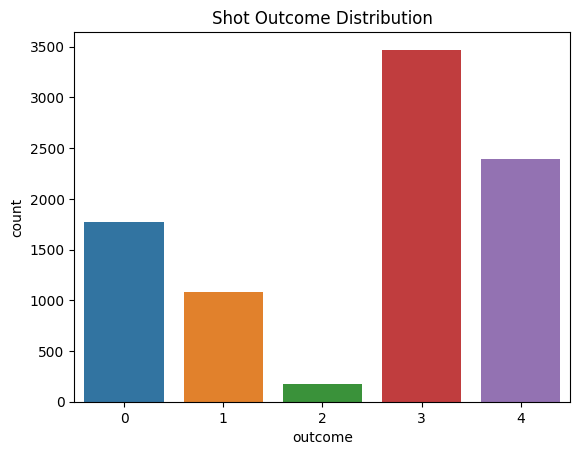

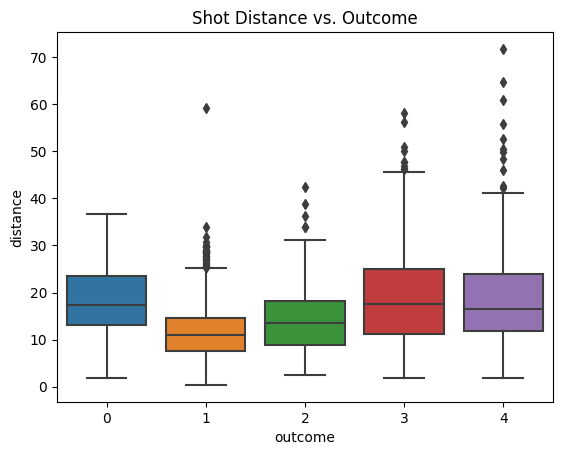

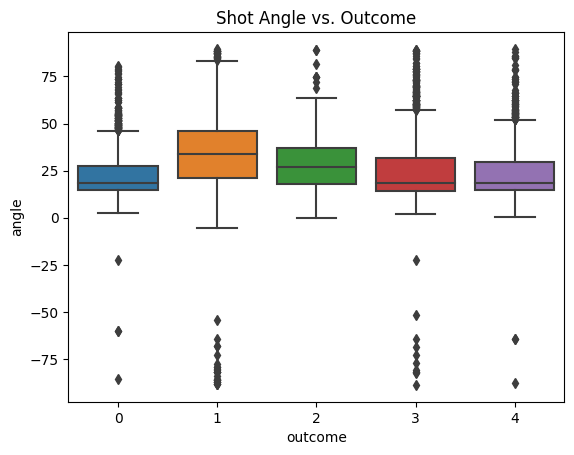

In [131]:
# Visualize shot outcome distribution
sns.countplot(x="outcome", data=football_df)
plt.title("Shot Outcome Distribution")
plt.show()

# Visualize shot distance vs. outcome
sns.boxplot(x="outcome", y="distance", data=football_df)
plt.title("Shot Distance vs. Outcome")
plt.show()

# Visualize shot angle vs. outcome
sns.boxplot(x="outcome", y="angle", data=football_df)
plt.title("Shot Angle vs. Outcome")
plt.show()